In [1]:
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from Tree import Tree, Node

import sys  
sys.path.insert(0, '../notebooks/')
from utils import calc_cost, plot_kmeans, plot_tree_boundary

/Users/lucasmurtinho/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass centers=3, cluster_std=2.5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


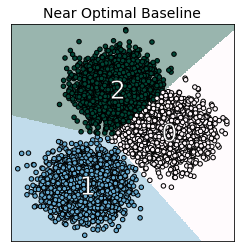

In [14]:
n = 10000
d = 2
k = 3
x_data, _ = make_blobs(n, d, k, 2.5, random_state=42)

kmeans = KMeans(k, random_state=42)
kmeans.fit(x_data)

plot_kmeans(kmeans, x_data)

40.4 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


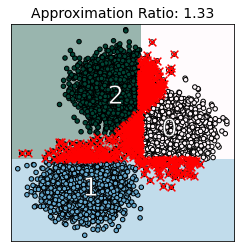

In [20]:
tree_1k = Tree(k)
%timeit tree_1k.fit(x_data, kmeans)

plot_tree_boundary(tree_1k, k, x_data, kmeans, plot_mistakes=True)

42 ms ± 1.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


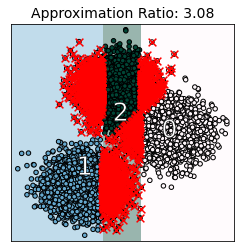

In [21]:
tree_0d = Tree(k, valid_col_idx=[0])
%timeit tree_0d.fit(x_data, kmeans)

plot_tree_boundary(tree_0d, k, x_data, kmeans, plot_mistakes=True)

60.1 ms ± 4.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


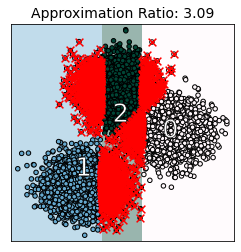

In [22]:
tree_c0 = Tree(k, valid_col_idx=[0])
%timeit tree_c0.fit_1d_cost_search(x_data,kmeans)
plot_tree_boundary(tree_c0, k, x_data, kmeans, plot_mistakes=True)

41.1 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


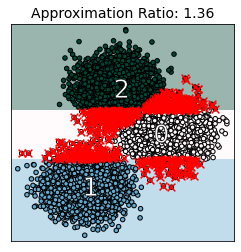

In [23]:
tree_1d = Tree(k, valid_col_idx=[1])
%timeit tree_1d.fit(x_data, kmeans)

plot_tree_boundary(tree_1d, k, x_data, kmeans, plot_mistakes=True)

61.7 ms ± 1.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


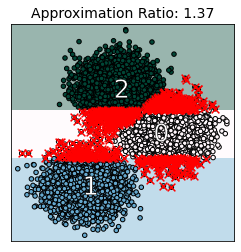

In [24]:
tree_c1 = Tree(k, valid_col_idx=[1])
%timeit tree_c1.fit_1d_cost_search(x_data,kmeans)
plot_tree_boundary(tree_c1, k, x_data, kmeans, plot_mistakes=True)